In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

#Read data frame from csv file
df = pd.read_csv('archive/Manhattan Weather Data 01 Jan 2020 - 31 Dec 2021 (1).csv', keep_default_na=True, delimiter=',', skipinitialspace=True, low_memory=False)

#Read size from csv
df.shape

(19005, 28)

In [22]:
#Checking for duplicate values

df.duplicated().sum()

#No duplicate data

0

In [23]:
#Basic information on dataframe features and feature types

df.info()

#All features could be potentially useful, and will therefore not be dropped

#Formatting seems to be accurate, and will not be altered

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19005 entries, 0 to 19004
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dt                   19005 non-null  int64  
 1   dt_iso               19005 non-null  object 
 2   timezone             19005 non-null  int64  
 3   city_name            19005 non-null  object 
 4   lat                  19005 non-null  float64
 5   lon                  19005 non-null  float64
 6   temp                 19005 non-null  float64
 7   visibility           18982 non-null  float64
 8   dew_point            19005 non-null  float64
 9   feels_like           19005 non-null  float64
 10  temp_min             19005 non-null  float64
 11  temp_max             19005 non-null  float64
 12  pressure             19005 non-null  int64  
 13  sea_level            0 non-null      float64
 14  grnd_level           0 non-null      float64
 15  humidity             19005 non-null 

In [24]:
#Converting epoch time to manhattan local time

df['dt'] = df['dt'] + df['timezone']

In [25]:
#Converting epoch time to datetime 

df['dt'] = pd.to_datetime(df['dt'], unit='s')

In [26]:
#Splitting new datetime into year/month/day/hour format

df['day'] = df['dt'].dt.day
df['month'] = df['dt'].dt.month
df['year'] = df['dt'].dt.year
df['hour'] = df['dt'].dt.hour

In [27]:
#Printing the first and last 5 rows to check data formatting 

print("First 5 rows:")
print(df.head())
print("Last 5 rows:\n")
print(df.tail())

First 5 rows:
                   dt                         dt_iso  timezone  city_name  \
0 2019-12-31 19:00:00  2020-01-01 00:00:00 +0000 UTC    -18000  Manhattan   
1 2019-12-31 20:00:00  2020-01-01 01:00:00 +0000 UTC    -18000  Manhattan   
2 2019-12-31 21:00:00  2020-01-01 02:00:00 +0000 UTC    -18000  Manhattan   
3 2019-12-31 22:00:00  2020-01-01 03:00:00 +0000 UTC    -18000  Manhattan   
4 2019-12-31 23:00:00  2020-01-01 04:00:00 +0000 UTC    -18000  Manhattan   

        lat        lon    temp  visibility  dew_point  feels_like  ...  \
0  40.78306 -73.971249  279.98     10000.0     275.86      276.96  ...   
1  40.78306 -73.971249  279.92     10000.0     275.81      276.88  ...   
2  40.78306 -73.971249  279.23     10000.0     274.76      274.98  ...   
3  40.78306 -73.971249  279.10     10000.0     274.64      275.17  ...   
4  40.78306 -73.971249  278.83     10000.0     273.39      274.99  ...   

   snow_3h  clouds_all  weather_id  weather_main  weather_description  \
0    

In [28]:
#Sorting categorical and continuous features

categorical = ['dt_iso', 'weather_main', 'weather_description', 'weather_icon']
continuous = df

for item in categorical:
    continuous.drop(item, axis=1)
    
continuous = list(continuous)

In [29]:
#Checking for missing values

full = list(df)

for item in full:
    percent_missing = df[item].isnull().sum() * 100 / len(df)
    print(f'{item}: {percent_missing}')

#Significant amount of missing data for sea_level, grnd_lvl, wind_gust, rain_1h, rain_3h, snow_1h, snow_3h. These will be dropped as there are not hugely relevant to the machine learning data

dt: 0.0
dt_iso: 0.0
timezone: 0.0
city_name: 0.0
lat: 0.0
lon: 0.0
temp: 0.0
visibility: 0.12102078400420942
dew_point: 0.0
feels_like: 0.0
temp_min: 0.0
temp_max: 0.0
pressure: 0.0
sea_level: 100.0
grnd_level: 100.0
humidity: 0.0
wind_speed: 0.0
wind_deg: 0.0
wind_gust: 36.41147066561431
rain_1h: 76.73770060510392
rain_3h: 96.91133912128387
snow_1h: 98.58984477769008
snow_3h: 99.84214680347277
clouds_all: 0.0
weather_id: 0.0
weather_main: 0.0
weather_description: 0.0
weather_icon: 0.0
day: 0.0
month: 0.0
year: 0.0
hour: 0.0


In [30]:
#dropping columns with high amounts of missing data

drop = ['sea_level', 'grnd_level', 'wind_gust', 'rain_1h', 'rain_3h', 'snow_1h', 'snow_3h']

df = df.drop(drop, axis=1)

array([[<AxesSubplot:title={'center':'dt'}>,
        <AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'temp_min'}>,
        <AxesSubplot:title={'center':'wind_speed'}>,
        <AxesSubplot:title={'center':'day'}>],
       [<AxesSubplot:title={'center':'timezone'}>,
        <AxesSubplot:title={'center':'visibility'}>,
        <AxesSubplot:title={'center':'temp_max'}>,
        <AxesSubplot:title={'center':'wind_deg'}>,
        <AxesSubplot:title={'center':'month'}>],
       [<AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'dew_point'}>,
        <AxesSubplot:title={'center':'pressure'}>,
        <AxesSubplot:title={'center':'clouds_all'}>,
        <AxesSubplot:title={'center':'year'}>],
       [<AxesSubplot:title={'center':'lon'}>,
        <AxesSubplot:title={'center':'feels_like'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'weather_id'}>,
        <AxesSubplot:title={'center':'hour'}>]], 

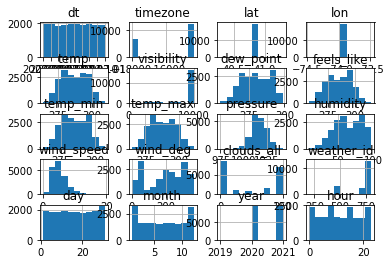

In [31]:
#Plot histograms for continuous features

df.hist().T

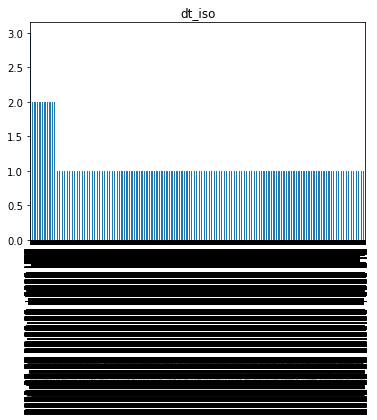

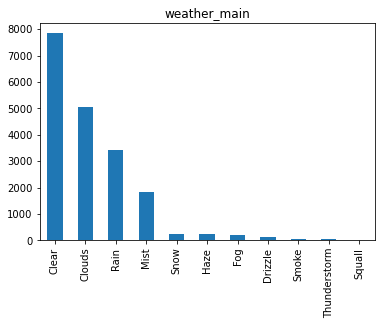

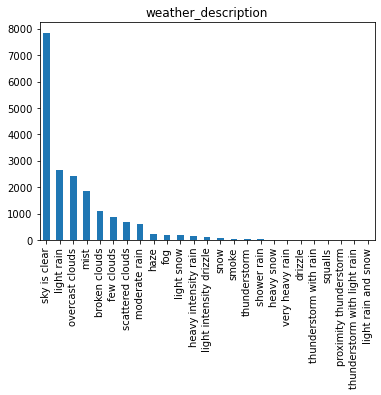

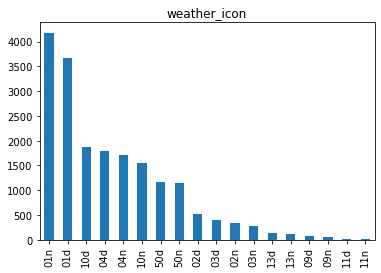

In [32]:
#Plot bar plots for categorical features

for item in categorical:
    df[item].value_counts(dropna=False).plot(kind='bar', title=item)
    plt.show()

In [33]:
#Saving cleaned frame to CSV

df.to_csv('cleaned_weather_df.csv', index=False)